In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import bernoulli, binom, zscore
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score

In [9]:
np.random.seed(37)
sns.set(color_codes=True)

In [10]:
n = 10_000
X = np.hstack([
    np.array([1 for _ in range(n)]).reshape(n, 1),
    np.random.normal(0, 1, n).reshape(n, 1),
    np.random.normal(0, 1, n).reshape(n, 1)
])
z = np.dot(X, np.array([1.0, 2.0, 3.0])) + np.random.normal(0, 1, n)
p = 1.0 / (1.0 + np.exp(-z))
y = binom.rvs(1, p)

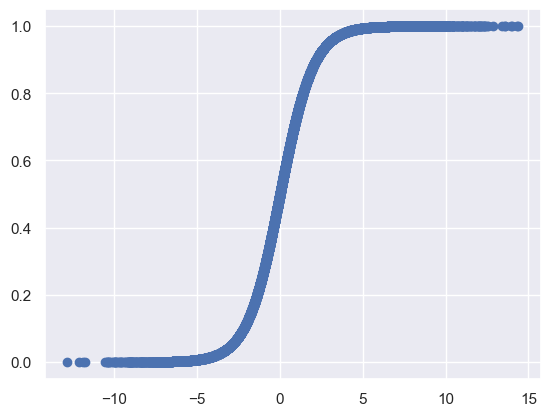

In [11]:
plt.scatter(z, p)

In [12]:
lr = LogisticRegression(fit_intercept=False, solver="lbfgs")
lr.fit(X, y)
w = np.array(lr.coef_).transpose()
y_pred = lr.predict_proba(X)[:, 1]
print(lr.coef_)

[[0.89312519 1.71445566 2.59091944]]


In [13]:
t1 = np.sum(np.power(y - y_pred, 2))
t2 = np.sum(np.power((y - np.sum(y) / n), 2))
1.0 - t1 / t2

0.5513983981594343

In [14]:
print(roc_auc_score(y, y_pred))
print(average_precision_score(y, y_pred))

0.9247885714967278
0.9477430382773055
